In [235]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
dir_string = 'C:/Users/rannu/OneDrive - NTNU/Desktop/VsPython/'+\
                'Spain/NMfDS/Assignments/'
sys.path.append(dir_string + 'Ass4')
sys.path.append(dir_string + 'Ass6')
sys.path.append(dir_string + 'Ass7')
sys.path.append(dir_string + 'Ass8')
sys.path.append(dir_string + 'Ass9')
from RTBP_definitions import r1, r2, OMEGA, ODE_R3BP, Jacobi_first_integral
from Lagrange_computations import compute_Lagrange_pt, compute_jacobi_const_Li
from custom_ODE_solver import ODE_solver
from PoincareR3BP import poincare_map_solve_ivp_R3BP
from variational_equation_RTBP import variational_eq
from crossings_RTBP import crossings_R3BP_by_mu

### Initial testing of environment

In [236]:
mu = 0.22

In [237]:
# print(compute_Lagrange_pt(mu, 3))
L3 = [compute_Lagrange_pt(mu, 3), 0, 0, 0]
L3.extend([1, 0, 0, 0, 
           0, 1, 0, 0, 
           0, 0, 1, 0, 
           0, 0, 0, 1])  # initial conditions and identity matrix
time_span = 0

# compute the Jacobian matrix of the RTBP at Li.
# The eigenvalues of this matrix are the frequencies of the periodic orbit

A = variational_eq(time_span, L3, mu, 1)[4:20].reshape(4,4)
# print('det(A) = \n', A)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_pos = eigenvalues[3].real
lambda_neg = eigenvalues[2].real
eigvec_pos = eigenvectors[:,3]
eigvec_neg = eigenvectors[:,2]
print('\neigenvalues = \n', lambda_pos, ",", lambda_neg)
print('\nTheir respective normalized eigenvectors = \n', -eigvec_pos.real, \
      ",\n", eigvec_neg.real)
# Only the real part of the eigenvectors are needed

iregion = 1

A = variational_eq(time_span, L3, mu, iregion)[4:20].reshape(4,4)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_pos = eigenvalues[3].real
eigvec_pos = eigenvectors[:,3]
v = -eigvec_pos.real
init_cond = L3[0:4] + v*10**-6


# Find the crossing time of the unstable manifold with the Poincare section
t0 = 0
tmax = 0.15
dt = 0.1
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 20000
refinement_fine = 300
tol = 1e-14

newInitial, TimeDuration,_ = \
    poincare_map_solve_ivp_R3BP(lambda t, X: ODE_R3BP(t, mu, X), init_cond, 
                                iregion, dt, t_span, mu, 
                                init_search = refinement, 
                                refinement = refinement_fine, 
                                newton_tol = tol)

# print("\nTime duration of the unstable manifold = ", TimeDuration)
# print("\nInitial conditions of the unstable manifold = ", newInitial)



eigenvalues = 
 0.7412179320243198 , -0.7412179320243181

Their respective normalized eigenvectors = 
 [ 0.36781288 -0.71422905  0.2726295  -0.52939938] ,
 [-0.36781288 -0.71422905  0.2726295   0.52939938]


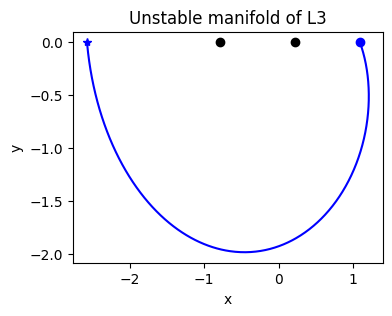

In [239]:
# Solve the R3BP equations
# t0 = 0
# tmax = TimeDuration
# dt = 0.01
# t_span = np.arange(t0, tmax, dt)
tmax_plot = TimeDuration
t_span_plot = np.arange(t0, tmax_plot, 0.01)

# Solve ode_r3bp using the custom ODE solver,  RETURNS: the solution of the 
# system of ODEs as a scipy.integrate.solve_ivp object
sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu, X), init_cond, tmax_plot, 
                 len(t_span_plot), tol=1e-12, method='DOP853', hamiltonian=0)

# Extract the solution
x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]

# plot the solution
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b', label='x-y')
ax.plot(x[0], y[0], 'bo', label='start')
ax.plot(x[-1], y[-1], 'b*', label='end')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Unstable manifold of L3')
#ax.legend()
#ax.plot(newInitial[0], newInitial[1], 'ro', label='start')
# plot a point at (mu, 0)
ax.plot(mu, 0, 'ko', label='mu')
# plot a point at (mu-1, 0)
ax.plot(mu-1, 0, 'ko', label='mu-1')
plt.show()

In [9]:
# test the function
iregion = 1
mu = 0.1
# Solve the variational equations
t0 = 0
tmax = 0.15
dt = 0.1
t_span = np.arange(t0, tmax, dt)

refinement= 20000
init_tol = 1e-15
refinement_fine = 300
tol = 1e-14
start_cond_tol = 10**-6

crossing_times, crossing_initials,_ = \
    crossings_R3BP_by_mu(1, 3, lambda t, X: ODE_R3BP(t, mu, X), iregion, dt, 
                         t_span, mu, refinement, init_tol, refinement_fine, 
                         tol, start_cond_tol)

print("\nTime duration of the unstable manifold = ", crossing_times)
print("\nInitial conditions of the unstable manifold = \n", crossing_initials)



Time duration of the unstable manifold =  [32.46888568]

Initial conditions of the unstable manifold = 
 [[-1.93098638e+00 -3.67761377e-15 -4.45099793e-02  1.30667783e+00]]


In [10]:
# mu interval calculations
#  xincmu 0.00001, mu in (0.001,0.015)
print("number of mu values = ", int((0.015-0.001)/0.00001))
mu = np.arange(0.001, 0.015, 0.00001)
print("number of mu values in list = ", len(mu))
# xincmu 0.0001, mu in (0.015,0.05)
print("\nnumber of mu values = ", int((0.05-0.015)/0.0001))
mu = np.arange(0.015, 0.05, 0.0001)
print("number of mu values in list = ", len(mu))
# xincmu 0.001, mu in (0.05,0.49)
print("\nnumber of mu values = ", int((0.49-0.05)/0.001))
mu = np.arange(0.05, 0.49, 0.001)
print("number of mu values in list = ", len(mu))

number of mu values =  1399
number of mu values in list =  1400

number of mu values =  350
number of mu values in list =  350

number of mu values =  440
number of mu values in list =  440


In [11]:
# TEMPORARY
def crossings_R3BP_TEMP(no_crossings, ODE_R3BP, initial_conditions, dir,
                                step, t_span, mu, init_search=100, 
                                refinement=100, newton_tol = 1e-15):
    crossing_times = np.zeros(no_crossings)
    crossing_initials = np.zeros((no_crossings, 4))
    new_initial, time_duration = poincare_map_solve_ivp_R3BP\
                                                (ODE_R3BP, initial_conditions, dir,
                                                step, t_span, mu, init_search, 
                                                refinement, newton_tol)
    crossing_times[0] = time_duration
    crossing_initials[0] = new_initial

    for i in range(1, no_crossings):
        new_initial, time_duration = poincare_map_solve_ivp_R3BP\
                                        (ODE_R3BP, crossing_initials[i-1], dir,
                                        step, t_span, mu, init_search, 
                                        refinement, newton_tol)
        crossing_times[i] = time_duration
        crossing_initials[i] = new_initial
    
    return crossing_times, crossing_initials

def crossings_R3BP_by_mu_TEMP(no_crossings, L123, ODE_R3BP, dir,
                                step, t_span, mu, init_search=100, 
                                refinement=100, newton_tol = 1e-15,
                                start_cond_tol = 10**-6):
    Li = [compute_Lagrange_pt(mu, L123), 0, 0, 0] 
    Li.extend([1, 0, 0, 0, 
               0, 1, 0, 0, 
               0, 0, 1, 0, 
               0, 0, 0, 1])  # initial conditions and identity matrix
    time_span = 0

    # compute the Jacobian matrix of the RTBP at Li.
    # The eigenvalues of this matrix are the frequencies of the periodic orbit

    A = variational_eq(t_span[0], Li, mu, 1)[4:20].reshape(4,4)
    eigenvalues, eigenvectors = np.linalg.eig(A)
    lambda_pos = eigenvalues[3].real
    lambda_neg = eigenvalues[2].real
    eigvec_pos = eigenvectors[:,3].real
    eigvec_neg = eigenvectors[:,2].real
    if dir == 1:
        if eigvec_pos[1] > 0:
            eigvec_pos = -eigvec_pos
        v = eigvec_pos
    elif dir == -1:
        v = eigvec_neg
    else:
        raise ValueError("Direction must be 1 or -1")
    init_cond = Li[0:4] + v*start_cond_tol

    crossing_times, crossing_initials = \
        crossings_R3BP_TEMP(no_crossings, ODE_R3BP, init_cond, dir, step, t_span, 
                       mu, init_search, refinement, newton_tol)
    
    return crossing_times, crossing_initials

In [18]:
from tqdm import tqdm # for the progress bar
def crossing_times_and_initials_by_mu(mu_list, Li, iregion, dt, t_span, 
                                      refinement, init_tol, refinement_fine,
                                      tol, start_cond_tol):
    crossing_times = np.zeros(len(mu_list))
    crossing_initials = np.zeros((len(mu_list), 4))
    for j, mu_val in tqdm(enumerate(mu_list, start=0)):
        crossing_times_mu, crossing_initials_mu,_ = \
            crossings_R3BP_by_mu(1, Li, lambda t, X: ODE_R3BP(t, mu_val, X),
                                iregion, dt, t_span, mu_val, 
                                refinement, init_tol, refinement_fine, tol,
                                start_cond_tol)
        crossing_times[j] = crossing_times_mu
        crossing_initials[j] = crossing_initials_mu
    return crossing_times, crossing_initials

In [13]:
# # test mu of only 5 different mu values
# mu_list = np.arange(0.001, 0.015, 0.005) 
# print("number of mu values = ", len(mu_list))
# # test the function
# iregion = 1

# # Solve the variational equations
# t0 = 0
# tmax = 30
# dt = 15
# t_span = np.arange(t0, tmax, dt)

# # Variables for tweaking the accuracy of the crossing time
# refinement = 2000
# refinement_fine = 100
# init_tol = 1e-7
# start_cond_tol = 10**-5

# # tol for newton solver:
# tol = 1e-2 # even a relatively large tolerance gives good results

# # Test the function
# crossing_times, crossing_initials = \
#     crossing_times_and_initials_by_mu(mu_list, 3, 1, dt, t_span, 
#                                       refinement, init_tol, refinement_fine, 
#                                       tol, start_cond_tol)

In [14]:
# print("\nTime duration of the unstable manifold =\n ", crossing_times)
# print("\nInitial conditions of the unstable manifold =\n ", crossing_initials)

In [15]:
# # plot for mu vs vx, aka the x-component of the velocity on 
# # the interval (0.001,.5) using the previously defined mu_list
# # against crossing_initials[:,2]

# # plot the solution
# fig = plt.figure(figsize=(4, 3))
# ax = fig.add_subplot(111)
# ax.scatter(mu_list, crossing_initials[:,2], color='b', label='x-y', s=1)
# ax.set_xlabel('mu')
# ax.set_ylabel("x'")
# ax.set_title('Unstable manifold of L3')
# plt.show()

In [21]:
# test mu of only 5 different mu values
mu_list = np.arange(0.015, 0.05, 0.001)
print("number of mu values = ", len(mu_list))

iregion = 1

t0 = 0
tmax = 30
dt = 15
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 2000
refinement_fine = 25
init_tol = 1e-7
start_cond_tol = 10**-5

# tol for newton solver:
tol = 1e-4 # even a relatively large tolerance gives good results

# Test the function
crossing_times, crossing_initials = \
    crossing_times_and_initials_by_mu(mu_list, 3, 1, dt, t_span, 
                                      refinement, init_tol, refinement_fine, 
                                      tol, start_cond_tol)

number of mu values =  35


35it [00:10,  3.45it/s]


In [ ]:
print("\nTime duration of the unstable manifold =\n ", crossing_times)
print("\nInitial conditions of the unstable manifold =\n ", crossing_initials)


Time duration of the unstable manifold =
  [ 73.34046733  75.70437521 106.66873441  75.15066181 116.93627628
  89.33486241   0.56574898  90.45123552  74.67754147  59.58856133
  58.94850249  58.31441112  57.69332707  62.61274139  70.44386336
  61.93723326  61.97435682 139.89701963 133.78254639  66.70178607
  94.08056167 -27.44362898  61.54510806  60.35748558 120.09455492
  80.60544251  74.73625509   3.63101629  82.7142811   73.65086351
 115.49968666  93.84565152   4.47312528  88.81280584  75.06894821
  58.15606049  75.04962063  59.28166315 108.44612304  61.14386106
  44.8517293   44.55273005   1.36272938  47.25604668  45.16225232
  44.97469886  44.8423584   60.76843262  60.24153015   3.01573313
  89.16204175  59.37905412  74.38745229  44.48068304  41.17930762
  40.95327566  40.73130612  47.41421078  45.24364297  46.97703851
  39.88172807   2.56540823  53.00892114   2.0149786   46.00456015
  45.82396507  45.64705279  45.47358768  45.30337871  45.13626812]

Initial conditions of the unst

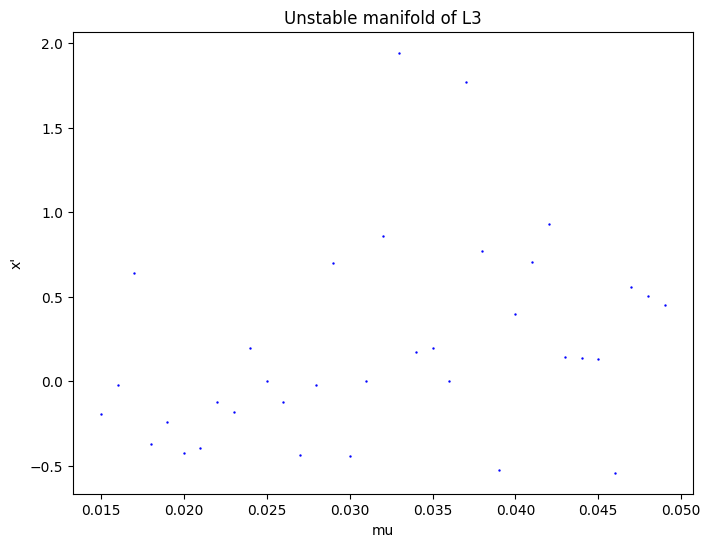

In [22]:
# plot for mu vs vx, aka the x-component of the velocity on 
# the interval (0.001,.5) using the previously defined mu_list
# against crossing_initials[:,2]

# plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(mu_list, crossing_initials[:,2], color='b', label='x-y', s=0.5)
ax.set_xlabel('mu')
ax.set_ylabel("x'")
ax.set_title('Unstable manifold of L3')
plt.show()